## Installing Necessary Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Datasets

In [9]:
deliveries= pd.read_csv("IPL_BALLS_2008_2022.csv")
matches=pd.read_csv("IPL_MATCHES_2008_2022.csv")

#### Pre Inspection

In [10]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [11]:
deliveries.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


#### Adding total score column in Matches df

In [12]:
total_score_df= deliveries.groupby(['ID','innings']).sum()['total_run'].reset_index()

In [13]:
team1_score_df=total_score_df[total_score_df['innings']==1]
team2_score_df=total_score_df[total_score_df['innings']==2]

In [14]:
team1_score_df.rename(columns={'total_run': 'team1_runs'}, inplace=True)
team2_score_df.rename(columns={'total_run': 'team2_runs'}, inplace=True)

/tmp/ipykernel_8278/2836941195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1_score_df.rename(columns={'total_run': 'team1_runs'}, inplace=True)
/tmp/ipykernel_8278/2836941195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2_score_df.rename(columns={'total_run': 'team2_runs'}, inplace=True)


In [15]:
matches=matches.merge(team2_score_df[['ID','team2_runs']],on='ID')
matches=matches.merge(team1_score_df[['ID','team1_runs']],on='ID')

In [16]:
matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,team2_runs,team1_runs
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,133,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,161,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,193,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,191,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,160,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,112,110
944,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,166,165
945,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,132,129
946,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,207,240


#### Editing Team names to latest ones

In [17]:
matches['Team1'].unique().tolist()

['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Rising Pune Supergiant',
 'Gujarat Lions',
 'Rising Pune Supergiants',
 'Pune Warriors',
 'Deccan Chargers',
 'Kochi Tuskers Kerala']

In [18]:
teams=['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians']

In [19]:
matches['Team1']= matches['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['Team2']= matches['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['Team1']= matches['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
matches['Team2']= matches['Team2'].str.replace('Kings XI Punjab','Punjab Kings')
matches['Team1']= matches['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['Team2']= matches['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
deliveries['BattingTeam'] = deliveries['BattingTeam'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Deccan Chargers': 'Sunrisers Hyderabad'
})

In [20]:
matches=matches[matches['Team1'].isin(teams)]
matches=matches[matches['Team2'].isin(teams)]
deliveries=deliveries[deliveries['BattingTeam'].isin(teams)]

#### Handling Missing Values in Matches df

In [21]:
matches.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            2
WinningTeam          2
WonBy                0
Margin              15
method             819
Player_of_Match      2
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
team2_runs           0
team1_runs           0
dtype: int64

In [22]:
matches['City'] = matches.apply(lambda row: row['Venue'].split()[0] if pd.isnull(row['City']) else row['City'], axis=1)

In [23]:
matches[matches['SuperOver'].isnull()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,team2_runs,team1_runs
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,...,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe,41,62
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Capitals,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan,2,187


In [24]:
matches.dropna(subset=['SuperOver'], inplace=True)

In [25]:
matches['Margin'].fillna(0, inplace=True)

In [26]:
matches['method'].fillna('No', inplace=True)

In [27]:
matches['MatchNumber'] = matches['MatchNumber'].apply(lambda x: 'KO' if x in ['Final', 'Qualifier 2', 'Eliminator', 'Qualifier 1', 'Qualifier', 'Elimination Final', '3rd Place Play-Off', 'Semi Final'] else 'NO')

In [28]:
matches.head(5).T

,0,1,2,3,4
ID,1312200,1312199,1312198,1312197,1304116
City,Ahmedabad,Ahmedabad,Kolkata,Kolkata,Mumbai
Date,2022-05-29,2022-05-27,2022-05-25,2022-05-24,2022-05-22
Season,2022,2022,2022,2022,2022
MatchNumber,KO,KO,KO,KO,NO
Team1,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,Rajasthan Royals,Sunrisers Hyderabad
Team2,Gujarat Titans,Rajasthan Royals,Lucknow Super Giants,Gujarat Titans,Punjab Kings
Venue,"Narendra Modi Stadium, Ahmedabad","Narendra Modi Stadium, Ahmedabad","Eden Gardens, Kolkata","Eden Gardens, Kolkata","Wankhede Stadium, Mumbai"
TossWinner,Rajasthan Royals,Rajasthan Royals,Lucknow Super Giants,Gujarat Titans,Sunrisers Hyderabad
TossDecision,bat,field,field,field,bat


In [29]:
deliveries.head(5).T

,0,1,2,3,4
ID,1312200,1312200,1312200,1312200,1312200
innings,1,1,1,1,1
overs,0,0,0,0,0
ballnumber,1,2,3,4,5
batter,YBK Jaiswal,YBK Jaiswal,JC Buttler,YBK Jaiswal,YBK Jaiswal
bowler,Mohammed Shami,Mohammed Shami,Mohammed Shami,Mohammed Shami,Mohammed Shami
non-striker,JC Buttler,JC Buttler,YBK Jaiswal,JC Buttler,JC Buttler
extra_type,NaN,legbyes,NaN,NaN,NaN
batsman_run,0,0,1,0,0
extras_run,0,1,0,0,0


In [30]:
filtered_matches=matches[['ID','City','WinningTeam','team2_runs','team1_runs','Margin','MatchNumber','TossWinner','TossDecision','SuperOver','WonBy','method','Player_of_Match','Team2']]

In [31]:
deliveries=deliveries[deliveries['innings']==2]
deliveries.shape

(101740, 17)

In [32]:
df= filtered_matches.merge(deliveries,on='ID')
df.head(5).T

,0,1,2,3,4
ID,1312200,1312200,1312200,1312200,1312200
City,Ahmedabad,Ahmedabad,Ahmedabad,Ahmedabad,Ahmedabad
WinningTeam,Gujarat Titans,Gujarat Titans,Gujarat Titans,Gujarat Titans,Gujarat Titans
team2_runs,133,133,133,133,133
team1_runs,130,130,130,130,130
Margin,7.0,7.0,7.0,7.0,7.0
MatchNumber,KO,KO,KO,KO,KO
TossWinner,Rajasthan Royals,Rajasthan Royals,Rajasthan Royals,Rajasthan Royals,Rajasthan Royals
TossDecision,bat,bat,bat,bat,bat
SuperOver,N,N,N,N,N


In [33]:
df.fillna('No',inplace=True)

In [34]:
df.dtypes

ID                     int64
City                  object
WinningTeam           object
team2_runs             int64
team1_runs             int64
Margin               float64
MatchNumber           object
TossWinner            object
TossDecision          object
SuperOver             object
WonBy                 object
method                object
Player_of_Match       object
Team2                 object
innings                int64
overs                  int64
ballnumber             int64
batter                object
bowler                object
non-striker           object
extra_type            object
batsman_run            int64
extras_run             int64
total_run              int64
non_boundary           int64
isWicketDelivery       int64
player_out            object
kind                  object
fielders_involved     object
BattingTeam           object
dtype: object

In [35]:
df['current score'] = df.groupby('ID')['total_run'].cumsum()

In [36]:
df['runs_left']=df['team1_runs']-df['current score']

In [37]:
df['balls_left']= 120-(df['overs']*6+df['ballnumber'])

In [38]:
df = df[df['method'] == 'No']
df.drop('method',axis=1,inplace=True)

In [39]:
df['wickets'] = df.groupby('ID')['isWicketDelivery'].cumsum()
df['wickets_left']=10-df['wickets']

In [40]:
df.drop('wickets',axis=1,inplace=True)

In [41]:
df= df[df['balls_left']>0]
df= df[df['runs_left']>0]

In [42]:
df.shape

(93997, 33)

In [43]:
df=df[df['SuperOver']!='Y']
df.shape

(92402, 33)

In [44]:
df['crr']=df['current score']/((120-df['balls_left'])/6)

In [45]:
df['rrr']=df['runs_left']/(df['balls_left']/6)

In [46]:
def result(row):
    return 1 if row['BattingTeam']==row['WinningTeam'] else 0

In [47]:
df['results']= df.apply(result,axis=1)
df.tail().T

,95942,95943,95944,95945,95946
ID,335982,335982,335982,335982,335982
City,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore
WinningTeam,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders
team2_runs,82,82,82,82,82
team1_runs,222,222,222,222,222
Margin,140.0,140.0,140.0,140.0,140.0
MatchNumber,NO,NO,NO,NO,NO
TossWinner,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore
TossDecision,field,field,field,field,field
SuperOver,N,N,N,N,N


In [48]:
fdf = df[['BattingTeam','Team2','City','runs_left','balls_left','wickets_left','crr','rrr','team1_runs','results']]
fdf

,BattingTeam,Team2,City,runs_left,balls_left,wickets_left,crr,rrr,team1_runs,results
0,Gujarat Titans,Gujarat Titans,Ahmedabad,130,119,10,0.000000,6.554622,130,1
1,Gujarat Titans,Gujarat Titans,Ahmedabad,130,118,10,0.000000,6.610169,130,1
2,Gujarat Titans,Gujarat Titans,Ahmedabad,129,117,10,2.000000,6.615385,130,1
3,Gujarat Titans,Gujarat Titans,Ahmedabad,129,116,10,1.500000,6.672414,130,1
4,Gujarat Titans,Gujarat Titans,Ahmedabad,129,115,10,1.200000,6.730435,130,1
...,...,...,...,...,...,...,...,...,...,...
95942,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,31,1,5.393258,27.483871,222,0
95943,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,141,30,1,5.400000,28.200000,222,0
95944,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,141,29,1,5.340659,29.172414,222,0
95945,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,140,29,1,5.406593,28.965517,222,0


In [49]:
fdf=fdf.sample(fdf.shape[0])

In [50]:
fdf

,BattingTeam,Team2,City,runs_left,balls_left,wickets_left,crr,rrr,team1_runs,results
25986,Mumbai Indians,Mumbai Indians,Mumbai,101,78,10,10.000000,7.769231,171,1
60483,Kolkata Knight Riders,Kolkata Knight Riders,Chennai,32,13,7,9.420561,14.769231,200,0
10025,Punjab Kings,Punjab Kings,Sharjah,33,15,5,7.485714,13.200000,164,0
26367,Rajasthan Royals,Rajasthan Royals,Mumbai,84,54,9,9.363636,9.333333,187,1
64452,Mumbai Indians,Mumbai Indians,Jaipur,69,56,10,8.718750,7.392857,162,1
...,...,...,...,...,...,...,...,...,...,...
84792,Royal Challengers Bangalore,Chennai Super Kings,Durban,96,85,7,5.657143,6.776471,129,1
79971,Kolkata Knight Riders,Kolkata Knight Riders,Delhi,106,50,6,6.085714,12.720000,177,0
20956,Kolkata Knight Riders,Kolkata Knight Riders,Sharjah,76,23,4,9.402062,19.826087,228,0
48409,Sunrisers Hyderabad,Delhi Capitals,Visakhapatnam,115,79,8,7.609756,8.734177,167,0


In [51]:
fdf.describe()

,runs_left,balls_left,wickets_left,crr,rrr,team1_runs,results
count,92402.000000,92402.000000,92402.000000,92402.000000,92402.000000,92402.000000,92402.000000
mean,93.138590,63.199130,7.563570,7.402961,10.605363,165.473918,0.424677
std,49.310641,33.051431,2.137717,2.241167,13.003608,28.849578,0.494297
min,1.000000,1.000000,0.000000,0.000000,0.083333,67.000000,0.000000
25%,54.000000,35.000000,6.000000,6.255319,7.161290,147.000000,0.000000
50%,92.000000,64.000000,8.000000,7.466667,8.869565,165.000000,0.000000
75%,130.000000,92.000000,9.000000,8.640000,10.947368,185.000000,1.000000
max,246.000000,119.000000,10.000000,36.000000,708.000000,246.000000,1.000000


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer= ColumnTransformer([('cat', OneHotEncoder(drop='first'),['BattingTeam','Team2','City'])],remainder="passthrough")

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(fdf.drop('results',axis=1),fdf['results'],test_size=0.2)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [55]:
pipeline = Pipeline([
    ('transformer', transformer),
    ('model', LogisticRegression(solver='liblinear'))])
pipeline.fit(X_train,y_train)
pred=pipeline.predict(X_test)
accuracy_score(y_test,pred)

0.8138087765813539

In [56]:
pipeline.predict_proba(X_test.sample())

array([[0.50022933, 0.49977067]])

In [57]:
df.head().T

,0,1,2,3,4
ID,1312200,1312200,1312200,1312200,1312200
City,Ahmedabad,Ahmedabad,Ahmedabad,Ahmedabad,Ahmedabad
WinningTeam,Gujarat Titans,Gujarat Titans,Gujarat Titans,Gujarat Titans,Gujarat Titans
team2_runs,133,133,133,133,133
team1_runs,130,130,130,130,130
Margin,7.0,7.0,7.0,7.0,7.0
MatchNumber,KO,KO,KO,KO,KO
TossWinner,Rajasthan Royals,Rajasthan Royals,Rajasthan Royals,Rajasthan Royals,Rajasthan Royals
TossDecision,bat,bat,bat,bat,bat
SuperOver,N,N,N,N,N


In [58]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['ID'] == match_id]# Collecting all data of 1 Match
    match = match[(match['ballnumber'] == 6)]# Filtering onlt the 6th ball
    temp_df = match[['BattingTeam','Team2','City','runs_left','balls_left','wickets_left','crr','rrr','team1_runs']]# Final df with selected columns
    result = pipeline.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,2)#loose percentage
    temp_df['win'] = np.round(result.T[1]*100,2)#win percentage
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['team1_runs'].values[0]# getting target value
    temp_df['current_score']= target-temp_df['runs_left']
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win','current_score','rrr','crr']]
    return temp_df,target

In [59]:
pd.options.mode.chained_assignment = None

In [60]:
temp_df,target = match_progression(df,335990,pipeline)
temp_df

Target- 214


,end_of_over,runs_after_over,wickets_in_over,lose,win,current_score,rrr,crr
94933,1,5,0,85.50,14.50,5,11.000000,5.000000
94939,2,9,0,83.15,16.85,14,11.111111,7.000000
94945,3,5,1,89.26,10.74,19,11.470588,6.333333
94951,4,12,0,86.02,13.98,31,11.437500,7.750000
94958,5,26,0,71.36,28.64,57,10.466667,11.400000
94964,6,16,0,60.29,39.71,73,10.071429,12.166667
94970,7,9,0,55.63,44.37,82,10.153846,11.714286
94976,8,16,0,42.86,57.14,98,9.666667,12.250000
94982,9,12,0,34.82,65.18,110,9.454545,12.222222
94988,10,4,1,49.00,51.00,114,10.000000,11.400000


Text(0.5, 1.0, 'Target-214')

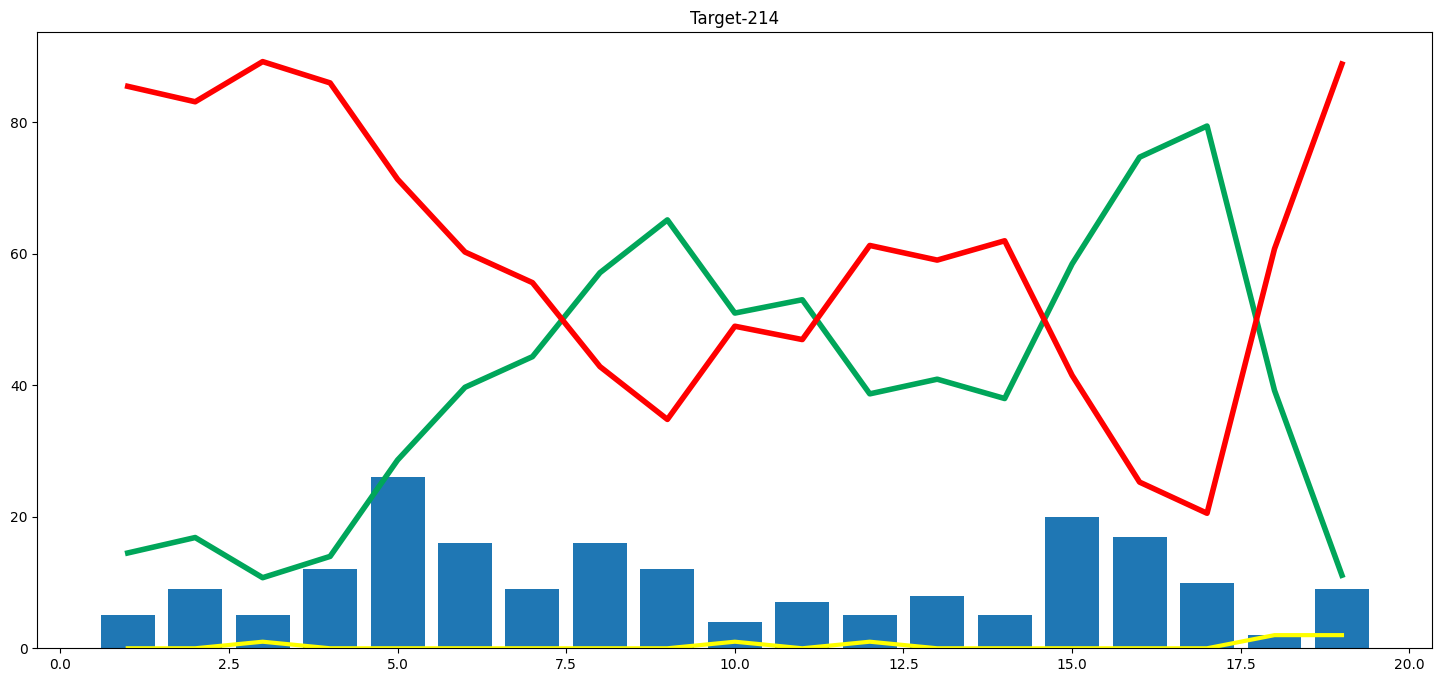

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [62]:
teams

['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians']

In [63]:
cities= df['City'].unique().tolist()
cities

['Ahmedabad',
 'Kolkata',
 'Mumbai',
 'Navi Mumbai',
 'Pune',
 'Dubai',
 'Sharjah',
 'Abu Dhabi',
 'Delhi',
 'Chennai',
 'Hyderabad',
 'Visakhapatnam',
 'Chandigarh',
 'Bengaluru',
 'Jaipur',
 'Indore',
 'Bangalore',
 'Raipur',
 'Ranchi',
 'Cuttack',
 'Dharamsala',
 'Nagpur',
 'Johannesburg',
 'Centurion',
 'Durban',
 'Bloemfontein',
 'Port Elizabeth',
 'Kimberley',
 'East London',
 'Cape Town']

In [64]:
import pickle
pickle.dump(pipeline,open('pipeline.pkl','wb'))

In [65]:
import joblib
joblib.dump(pipeline, 'my_pipeline.joblib')
loaded_pipeline = joblib.load('my_pipeline.joblib')

In [67]:
df.head()

,ID,City,WinningTeam,team2_runs,team1_runs,Margin,MatchNumber,TossWinner,TossDecision,SuperOver,...,kind,fielders_involved,BattingTeam,current score,runs_left,balls_left,wickets_left,crr,rrr,results
0,1312200,Ahmedabad,Gujarat Titans,133,130,7.0,KO,Rajasthan Royals,bat,N,...,No,No,Gujarat Titans,0,130,119,10,0.0,6.554622,1
1,1312200,Ahmedabad,Gujarat Titans,133,130,7.0,KO,Rajasthan Royals,bat,N,...,No,No,Gujarat Titans,0,130,118,10,0.0,6.610169,1
2,1312200,Ahmedabad,Gujarat Titans,133,130,7.0,KO,Rajasthan Royals,bat,N,...,No,No,Gujarat Titans,1,129,117,10,2.0,6.615385,1
3,1312200,Ahmedabad,Gujarat Titans,133,130,7.0,KO,Rajasthan Royals,bat,N,...,No,No,Gujarat Titans,1,129,116,10,1.5,6.672414,1
4,1312200,Ahmedabad,Gujarat Titans,133,130,7.0,KO,Rajasthan Royals,bat,N,...,No,No,Gujarat Titans,1,129,115,10,1.2,6.730435,1
